ANÁLISIS EXPLORATORIO DE LOS DATOS

Este notebook separa en tres secciones (Clientes, Vendedores, Productos) los insights junto con sus respectivas querys.

Antes de ejecutar las celdas, agregar al path el script de conexión:

In [4]:
import os
import sys

script_dir = os.path.abspath(os.path.join(os.getcwd(), '../scripts'))

if script_dir not in sys.path:
    sys.path.append(script_dir)

SOBRE LOS CLIENTES

Distribución geográfica:

C:\Users\minom\AppData\Local\Temp\ipykernel_13340\1491128943.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clientes_por_estado= pd.read_sql_query(query, conexion)


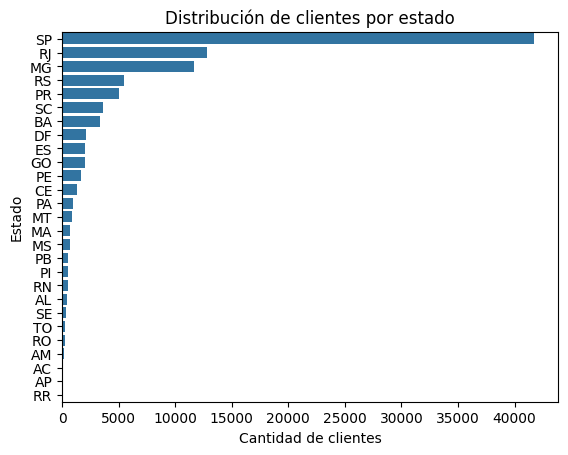

In [ ]:
from csv_to_table_script import conectar_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conexion = conectar_db()

query = """ 
        SELECT customer_state,
                    COUNT(*) as orders_per_state
            FROM customers
        GROUP BY customer_state
        ORDER BY orders_per_state DESC
        """

df_clientes_por_estado= pd.read_sql_query(query, conexion)

grafico = sns.barplot(
    x='orders_per_state', 
    y='customer_state', 
    data=df_clientes_por_estado,
)

plt.title('Distribución de clientes por estado')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Estado')

plt.show()

conexion.close()